# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import pos_tag


# Before Text Preprocessing

In [5]:
file_path = r".\Ori_Dataset\OriToxicData.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


## Check NULL

In [10]:
file_path = r".\Ori_Dataset\ToxicData.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

print("\nMissing values per column before drop:")
print(data.isnull().sum())



Missing values per column before drop:
text     0
label    0
dtype: int64


## Check Duplicated

In [ ]:
file_path = r".\Ori_Dataset\ToxicData.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

duplicate_rows = data[data.duplicated()]
print(f"Number of duplicated rows: {duplicate_rows.shape[0]}")

Number of duplicated rows: 3


## Distribution of spam & non-spam

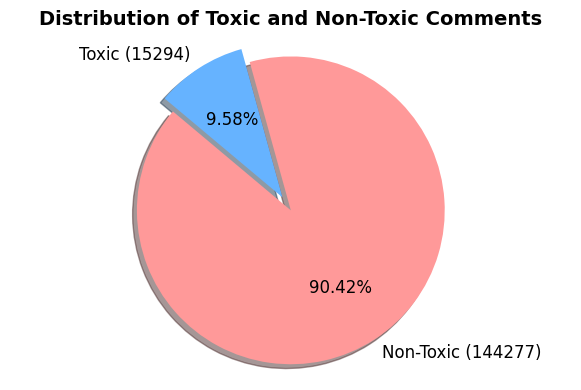

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r".\Ori_Dataset\ToxicData.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

def hate_NoHate_percenatge(label):
    if label == 1:
        return "Toxic"
    elif label == 0:
        return "Non-Toxic"
    return "Unknown"

data['label'] = data['label'].apply(hate_NoHate_percenatge)

label_counts = data['label'].value_counts()
labels = [f"{label} ({count})" for label, count in label_counts.items()]
colors = ['#ff9999','#66b3ff']  
explode = (0.05, 0.05)  

plt.figure(figsize=(6, 4))
plt.pie(label_counts, 
        labels=labels, 
        autopct='%1.2f%%',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 12})

plt.title("Distribution of Toxic and Non-Toxic Comments", fontsize=14, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()


## Word Frequency

Most common words:
 [('.', 487218), (',', 471813), ('the', 448516), ('to', 291386), ("''", 242507), ('I', 222051), ('of', 220440), ('and', 211349), ('a', 203371), ('you', 180285)]


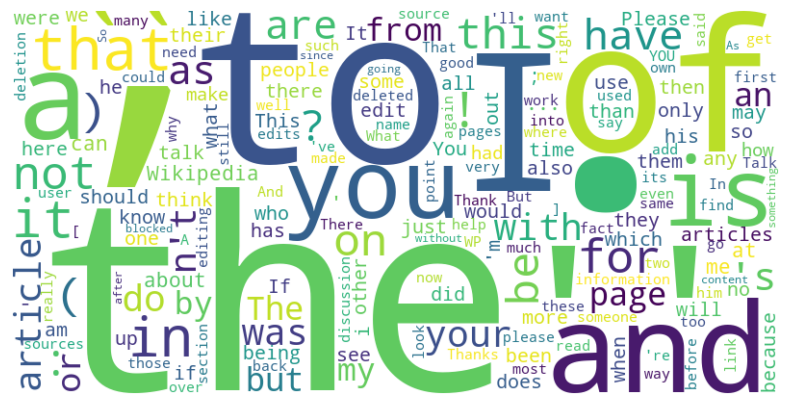

In [12]:
# word cloud all
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

file_path = r".\Ori_Dataset\ToxicData.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Combine all text data into a single string
text_data = ' '.join(df['text'].astype(str)) 
words = word_tokenize(text_data)

word_counts = Counter(words)
most_common_words = word_counts.most_common(10) 
print("Most common words:\n", most_common_words)

# Create a word cloud from raw text data
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Unknown Word

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


                 word  frequency
0           wikipedia      48335
1                   â      29819
2                wiki       8085
3               doesn       6299
4                didn       5326
5                 pov       3590
6            contribs       2669
7              admins       2088
8                wasn       2074
9                npov       1868
10           username       1821
11        wikiproject       1779
12           uploaded       1771
13                  ð       1650
14            sourced       1642
15                  ã       1621
16               aren       1550
17             wouldn       1521
18            shouldn       1465
19             tildes       1436
20         wikipedian       1285
21                  î       1095
22                  ñ       1087
23            infobox       1060
24           barnstar       1033
25          templates       1026
26                rfc        954
27        wikipedians        940
28                  ù        932
29        

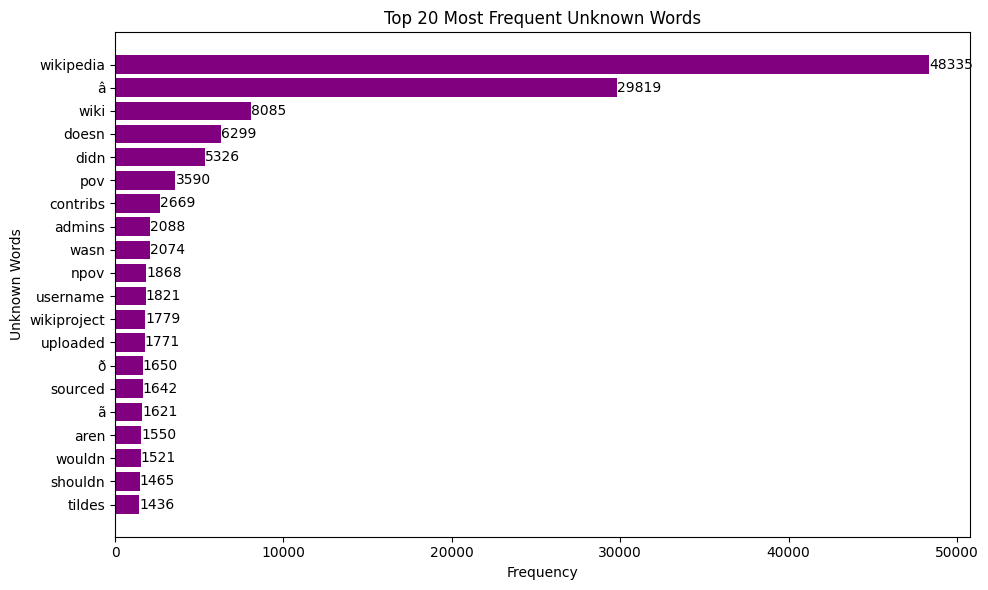

In [ ]:
import pandas as pd
import re
from nltk.corpus import wordnet, words
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import spacy
import enchant

nltk.download('wordnet')
nltk.download('words')

file_path =r".\Ori_Dataset\ToxicData.csv"
# file_path =r".\Pre_Dataset\2_remove.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
text_data = data['text']

nlp = spacy.load("en_core_web_sm")
spacy_vocab = set(nlp.vocab.strings)
en_dict = enchant.Dict("en_US")
# Combine WordNet and NLTK word list vocabularies
combined_vocab = set(words.words()) | set(wordnet.words()) | spacy_vocab

def find_unknown_words_combined(text):
    if not isinstance(text, str):  # Skip non-string values
        return []
    words_in_text = re.findall(r'\b\w+\b', text.lower())  # Extract words (ignoring punctuation)
    return [word for word in words_in_text if word not in combined_vocab]
data['unknown_words'] = data['text'].apply(find_unknown_words_combined)

# Flatten all unknown words into a single list
all_unknown_words = [word for words in data['unknown_words'] for word in words]

# Calculate the frequency of each unknown word
unknown_word_freq = Counter(all_unknown_words)

# Convert frequency to a DataFrame for visualization
freq_df = pd.DataFrame(unknown_word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
pd.set_option('display.max_rows', 200)  
freq_df = freq_df.reset_index(drop=True)
print(freq_df.head(100))

top_unknown = freq_df.head(20)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_unknown['word'], top_unknown['frequency'], color='purple')
plt.xlabel('Frequency')
plt.ylabel('Unknown Words')
plt.title('Top 20 Most Frequent Unknown Words')
plt.gca().invert_yaxis() 

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)),
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()


### Bigrams

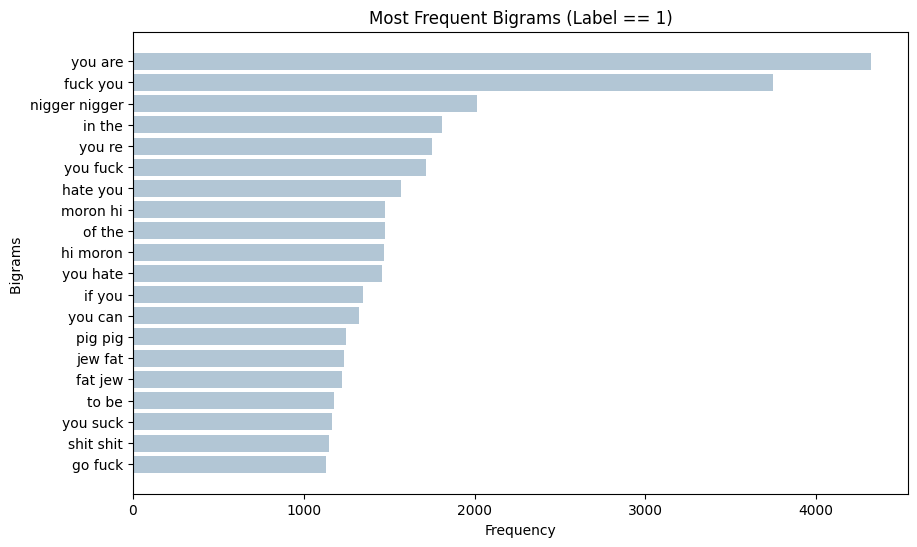

In [20]:
# Bigrams
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
file_path =r".\Ori_Dataset\ToxicData.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

data_label_1 = data[data['label'] == 1]
text_data = data_label_1['text'] 

# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(text_data)

# Use sparse matrix to sum up bigram counts
bigram_counts = np.array(X.sum(axis=0)).flatten()
bigram_freq = pd.DataFrame({
    'bigram': vectorizer.get_feature_names_out(),
    'frequency': bigram_counts
})

# Sort by frequency in descending order and take the top 20
bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(20)

# Plot the most frequent bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram_freq['bigram'], bigram_freq['frequency'], color='#B2C6D5')
plt.xlabel('Frequency')
plt.ylabel('Bigrams ')
plt.title('Most Frequent Bigrams (Label == 1)')
plt.gca().invert_yaxis()  # Display the most frequent at the top
plt.show()


### Tigrams

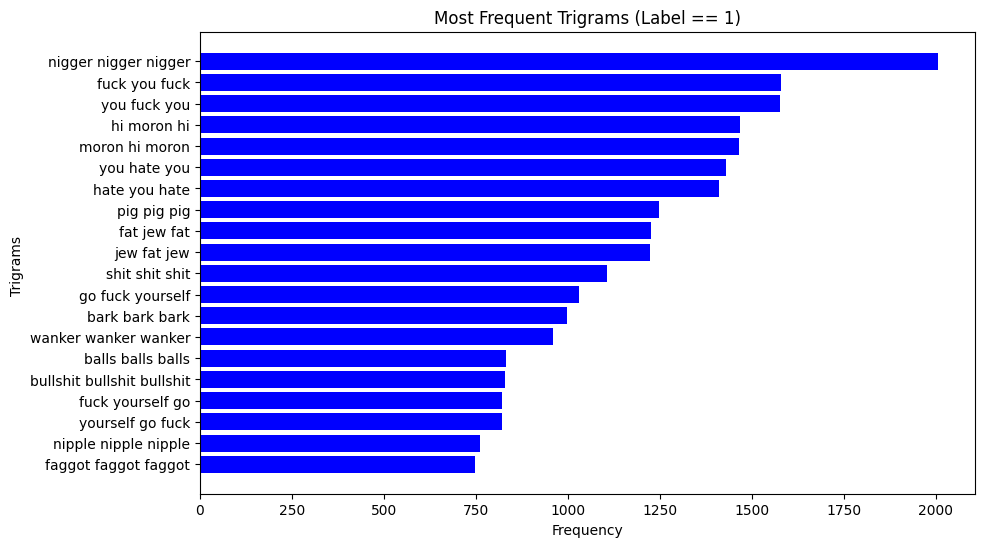

In [21]:
file_path =r".\Ori_Dataset\ToxicData.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

data_label_1 = data[data['label'] == 1]
text_data = data_label_1['text']

vectorizer = CountVectorizer(ngram_range=(3, 3))  
X = vectorizer.fit_transform(text_data)

bigram_counts = np.array(X.sum(axis=0)).flatten() 
bigram_freq = pd.DataFrame({
    'bigram': vectorizer.get_feature_names_out(),
    'frequency': bigram_counts
})

bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(bigram_freq['bigram'], bigram_freq['frequency'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Trigrams ')
plt.title('Most Frequent Trigrams (Label == 1)')
plt.gca().invert_yaxis()
plt.show()


# Before DATA Cleaning EDA

In [28]:
file_path = r".\Pre_Dataset\Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158167 entries, 0 to 158166
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    158167 non-null  object
 1   label   158167 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


## Distribution of Toxic and Non-Toxic

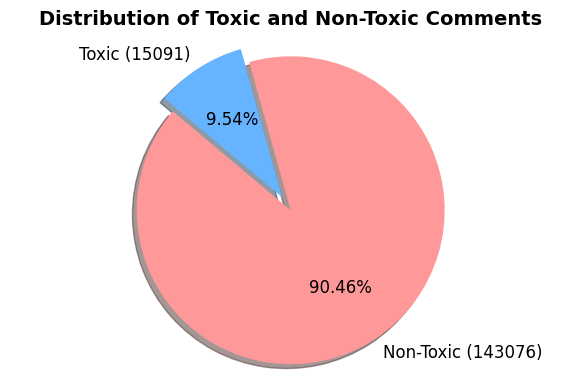

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r".\Pre_Dataset\Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

def hate_NoHate_percenatge(label):
    if label == 1:
        return "Toxic"
    elif label == 0:
        return "Non-Toxic"
    return "Unknown"

data['label'] = data['label'].apply(hate_NoHate_percenatge)

label_counts = data['label'].value_counts()
labels = [f"{label} ({count})" for label, count in label_counts.items()]
colors = ['#ff9999','#66b3ff']  
explode = (0.05, 0.05)  

plt.figure(figsize=(6, 4))
plt.pie(label_counts, 
        labels=labels, 
        autopct='%1.2f%%',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 12})

plt.title("Distribution of Toxic and Non-Toxic Comments", fontsize=14, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()



## Check Duplicated & NULL

In [30]:
file_path =  r".\Pre_Dataset\Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

print("\nMissing values per column before drop:")
print(data.isnull().sum())

duplicate_rows = data[data.duplicated()]
print(f"Number of duplicated rows: {duplicate_rows.shape[0]}")


Missing values per column before drop:
text     0
label    0
dtype: int64
Number of duplicated rows: 0


## Word Frequency

Most common words:
 [('article', 71551), ('page', 53422), ('wikipedia', 38249), ('talk', 37457), ('would', 33070), ('use', 30413), ('one', 28854), ('edit', 28529), ('make', 28339), ('please', 28166)]


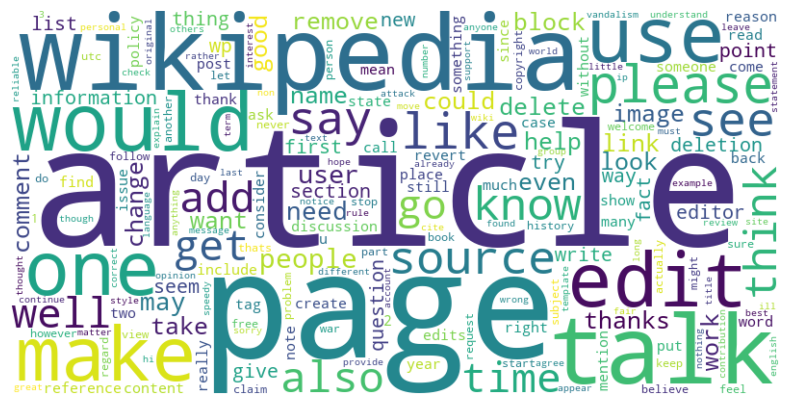

In [32]:
# word cloud all
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

file_path =  r".\Pre_Dataset\Final.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df= df[df['label'] == 0] 
# Combine all text data into a single string
text_data = ' '.join(df['text'].astype(str)) 
words = word_tokenize(text_data)

word_counts = Counter(words)
most_common_words = word_counts.most_common(10) 
print("Most common words:\n", most_common_words)

# Create a word cloud from raw text data
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Unknown Word

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


                 word  frequency
0           wikipedia      40980
1                wiki       5729
2                 pov       3536
3          wikipedias       2736
4            contribs       2652
5              admins       2153
6                npov       1855
7         wikiproject       1810
8            uploaded       1767
9            username       1733
10         wikipedian       1174
11            infobox       1064
12           barnstar       1004
13        wikipedians        952
14                rfc        936
15          unsourced        909
16                3rr        840
17                blp        790
18                rfa        775
19         sockpuppet        756
20              f5ffa        713
21             helpme        675
22                 03        625
23                 06        625
24                1px        623
25             arbcom        621
26        noticeboard        599
27           userpage        595
28          wikimedia        585
29        

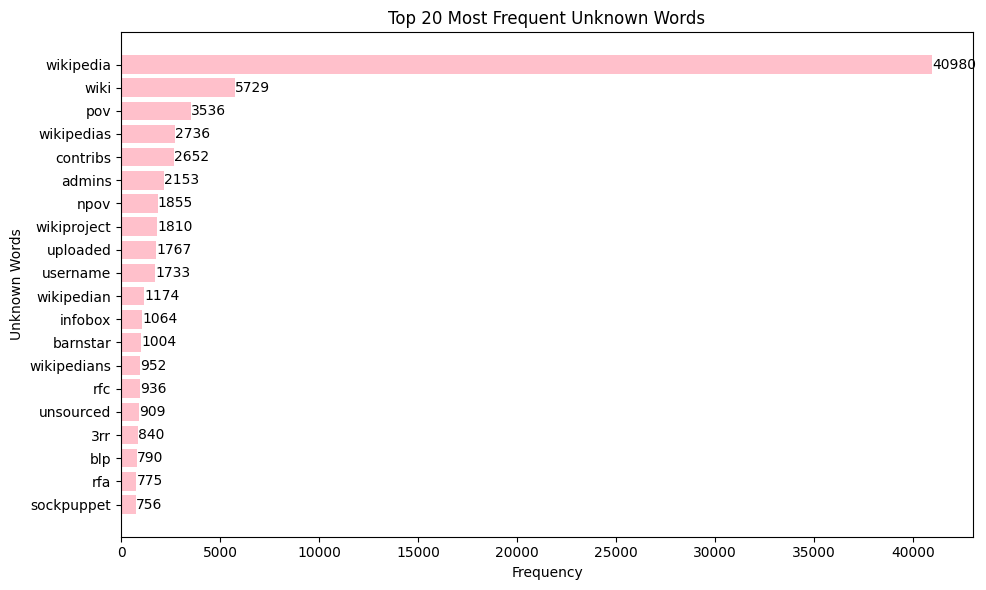

In [33]:
# unknow word
import pandas as pd
import re
from nltk.corpus import wordnet, words
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import spacy
import enchant

nltk.download('wordnet')
nltk.download('words')

file_path =  r".\Pre_Dataset\Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
text_data = data['text']

nlp = spacy.load("en_core_web_sm")
spacy_vocab = set(nlp.vocab.strings)
en_dict = enchant.Dict("en_US")
# Combine WordNet and NLTK word list vocabularies
combined_vocab = set(words.words()) | set(wordnet.words()) | spacy_vocab

def find_unknown_words_combined(text):
    if not isinstance(text, str):  # Skip non-string values
        return []
    words_in_text = re.findall(r'\b\w+\b', text.lower())  # Extract words (ignoring punctuation)
    return [word for word in words_in_text if word not in combined_vocab]
data['unknown_words'] = data['text'].apply(find_unknown_words_combined)

# Flatten all unknown words into a single list
all_unknown_words = [word for words in data['unknown_words'] for word in words]

# Calculate the frequency of each unknown word
unknown_word_freq = Counter(all_unknown_words)

# Convert frequency to a DataFrame for visualization
freq_df = pd.DataFrame(unknown_word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
pd.set_option('display.max_rows', 200)  
freq_df = freq_df.reset_index(drop=True)
print(freq_df.head(100))

top_unknown = freq_df.head(20)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_unknown['word'], top_unknown['frequency'], color='pink')
plt.xlabel('Frequency')
plt.ylabel('Unknown Words')
plt.title('Top 20 Most Frequent Unknown Words')
plt.gca().invert_yaxis() 

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)),
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## Unigrams

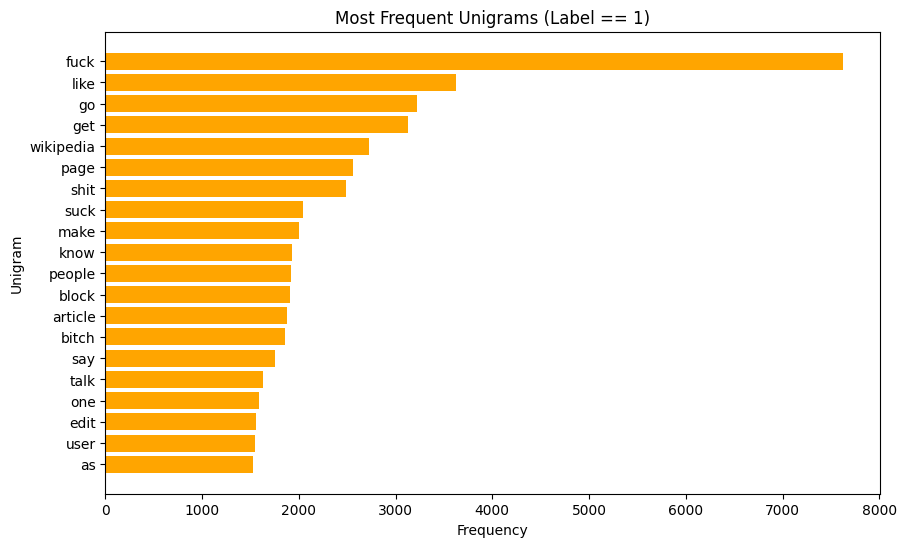

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

file_path =  r".\Pre_Dataset\Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

data_label_1 = data[data['label'] == 1]
text_data = data_label_1['text'] 

# Create a CountVectorizer for unigrams
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# Sum up the counts of each unigram
unigram_counts = X.toarray().sum(axis=0)
unigram_freq = pd.DataFrame({
    'unigram': vectorizer.get_feature_names_out(),
    'frequency': unigram_counts
})

# Sort by frequency in descending order
unigram_freq = unigram_freq.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(unigram_freq['unigram'], unigram_freq['frequency'], color='orange') #Horizontal Bar Chart
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.title('Most Frequent Unigrams (Label == 1)')
plt.gca().invert_yaxis()  # Display the most frequent at the top
plt.show()


### Bigrams

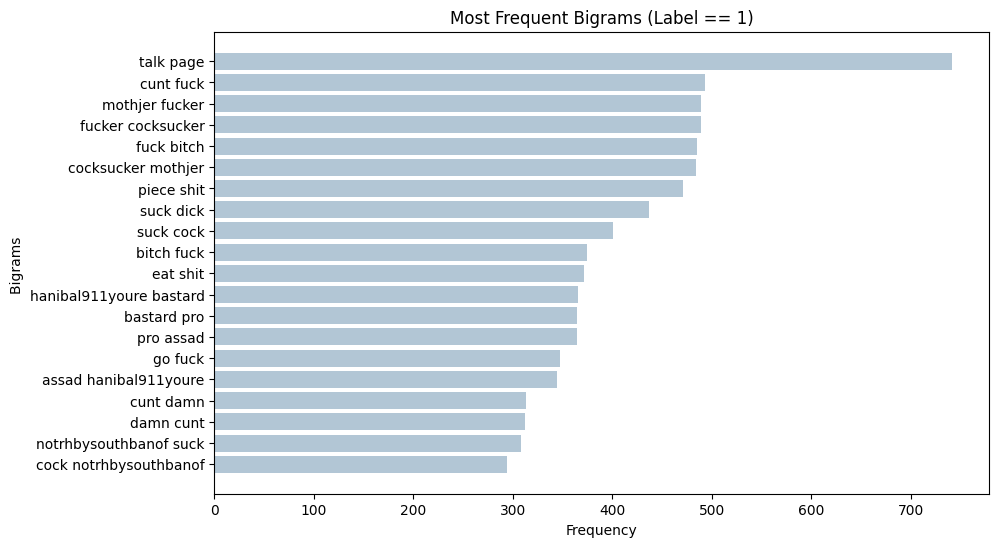

In [35]:
# Bigrams
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
file_path =  r".\Pre_Dataset\Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

data_label_1 = data[data['label'] == 1]
text_data = data_label_1['text'] 

# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(text_data)

# Use sparse matrix to sum up bigram counts
bigram_counts = np.array(X.sum(axis=0)).flatten()
bigram_freq = pd.DataFrame({
    'bigram': vectorizer.get_feature_names_out(),
    'frequency': bigram_counts
})

# Sort by frequency in descending order and take the top 20
bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(20)

# Plot the most frequent bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram_freq['bigram'], bigram_freq['frequency'], color='#B2C6D5')
plt.xlabel('Frequency')
plt.ylabel('Bigrams ')
plt.title('Most Frequent Bigrams (Label == 1)')
plt.gca().invert_yaxis()  # Display the most frequent at the top
plt.show()


### Tigrams

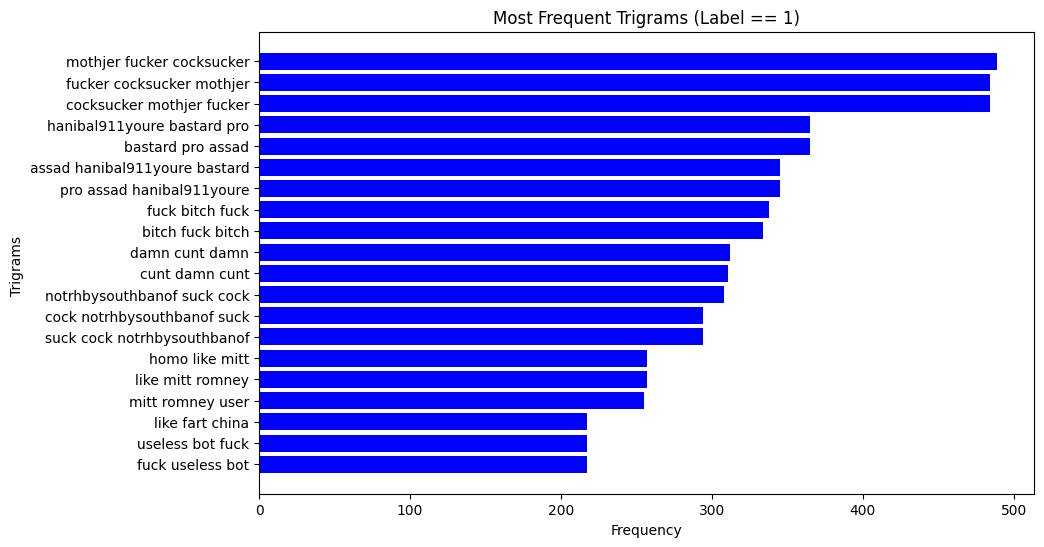

In [36]:
file_path =  r".\Pre_Dataset\Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

data_label_1 = data[data['label'] == 1]
text_data = data_label_1['text']

vectorizer = CountVectorizer(ngram_range=(3, 3))  
X = vectorizer.fit_transform(text_data)

bigram_counts = np.array(X.sum(axis=0)).flatten() 
bigram_freq = pd.DataFrame({
    'bigram': vectorizer.get_feature_names_out(),
    'frequency': bigram_counts
})

bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(bigram_freq['bigram'], bigram_freq['frequency'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Trigrams ')
plt.title('Most Frequent Trigrams (Label == 1)')
plt.gca().invert_yaxis()
plt.show()


## POS Tag

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


     POS    Count
0     NN  2656736
3     JJ  1088775
7     RB   365834
2    VBP   324610
4     VB   267434
6     CD   237316
1    NNS   135710
5     IN   111967
11   VBD    86085
9     MD    77804
8    VBZ    36661
15   VBN    28064
12   VBG    26677
22    DT    13263
21   JJS    12069
17    FW    11193
10   JJR     8970
20   RBR     6607
13   NNP     5620
14    CC     5555
19    RP     2914
24   WRB     2862
16   PRP     2731
28   WDT     2566
25    WP     2215
26    EX     1874
18    UH     1737
27   RBS      939
29    TO      893
23   WP$      810
30     $      766
31  PRP$      133
35   SYM       90
32   POS       82
33  NNPS       28
34   PDT       13
36    ''       10
38    LS        3
37    ``        1


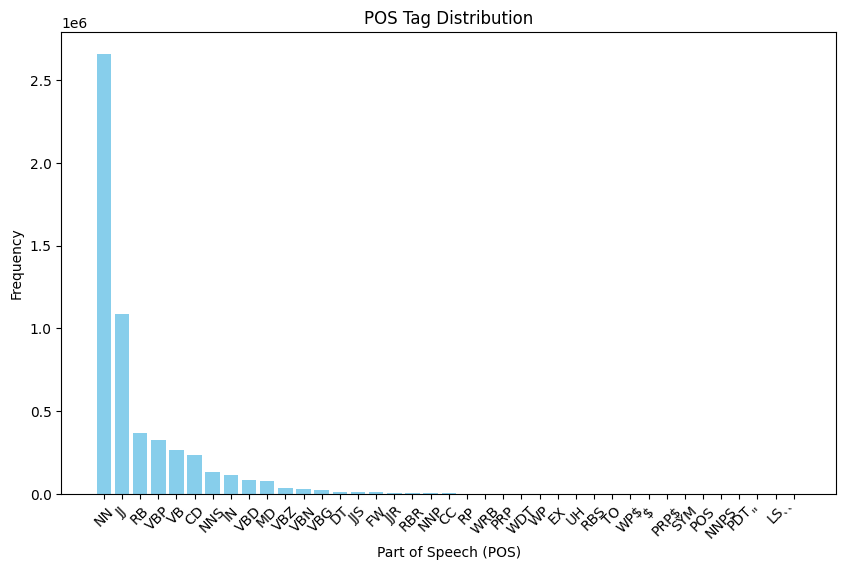

In [37]:
import pandas as pd
import nltk
from nltk import pos_tag, word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# downloaded NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

file_path =  r".\Pre_Dataset\Final.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

text_data = data['text']

# Function to get POS tags for a text
def get_pos_tags(text):
    if not isinstance(text, str):  # Skip non-string values
        return []
    tokens = word_tokenize(text)  # Tokenize the text
    return pos_tag(tokens)  # Get POS tags for tokens

# Apply POS tagging to the text
data['pos_tags'] = data['text'].apply(get_pos_tags)

# Flatten all POS tags into a single list
all_pos_tags = [tag for tags in data['pos_tags'] for _, tag in tags]

# Count the occurrences of each POS tag
pos_counts = Counter(all_pos_tags)

# Convert POS counts to a DataFrame for visualization
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count']).sort_values(by='Count', ascending=False)
print(pos_df)

# Plot the POS tag distribution
plt.figure(figsize=(10, 6))
plt.bar(pos_df['POS'], pos_df['Count'], color='skyblue')
plt.xlabel('Part of Speech (POS)')
plt.ylabel('Frequency')
plt.title('POS Tag Distribution')
plt.xticks(rotation=45)
plt.show()
